## Presentation Types:  Fuga, ID, and PEN with Verovio



### What Can You Do with this Notebook?


* This function uses several other functions to classify the entries in a given piece.

#### Key Features
* The output is a list, in order of offset, of each presentation type, including information about:
    - measures/beats
    - starting offset
    - **soggetti** involved (set the length of the soggetti with `melodic_ngram_length`, by default this is set to **4**, and uses diatonic intervals)
    - **melodic intervals** between successive entries (expressed as directed intervals, such as `P-5, P-8`)
    - **time intervals** between successive entries (expressed as offsets, like `8.0, 4.0, 8.0`)
    - **Labels Fuga, PEn, and ID** according to time intervals between entries. NIm not yet supported.
    - Reports **voice names of the entries**, in order of their appearance
    
#### Singletons, Long Gaps, and Parallel Entries

* Other features include:

    - Singleton soggetti (just one entry of a given motive in isolation) are not reported
    - If two entries are separated by more than about 9 bars (70 offsets), the tool resets to a new pattern
    - Identifies **Parallel Entries** in any passage.  If two voices enter at the same offset (normally in parallel thirds or tenths), the function will attempt to identify the voice that follows (or preceeds) other, non-parallel voices at the interval P1, P4, P5, P8, or P12 (which are more typical).  If neither of the parallel voices aligns with other parts in this way, the tool takes the upper-most voice as the real entry.  The parallel voice is removed from the pattern data, but the name of the voice is stored in another column (**Parallel Voice**).
    - Identifies the number of **Non Overlapping Entries** and reports the count in a separate column
      
#### Unisons, Flexes, and Hidden Entries
* In addition, the latest version of the tool offers a number of other important features:
     - **combine unisons** in the melodies under comparison (default = False).  This can be especially helpful when comparing different compositions based on the same model.
     - allow **melodic flexes** among the matching soggetti included in any particular event.  The flexing can be focused on the **first interval** with `head_flex` (default = 1), or permitted in any position with `body_flex` (default = 0). The latter are determined via a side-by-side comparison of all soggetti:  the threshold determines the cumulative difference among all successive intervals in each pair.  The presence of **flexed entries** is reported in a separate column, and all matching soggetti are reported in the soggetti column as a list.
     - the option to find **hidden PENs and IDs** among longer Fugas.  Set to false by default, passing `include_hidden_types=True` will instead consider **every combination** of voices in each Fuga, identifying sets of three or four voices that form PEns and IDs.  Both the complete pattern and the hidden patterns will be reported.
     
####  Typical Settings:

>`piece.presentationTypes(limit_to_entries = True,
                            head_flex=1,
                        body_flex = 0,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)`
     
#### Verovio Rendering of Excerpts
     
* It is also possible to display the results of the Presentation Type classifier in the Notebook with Verovio. Each excerpt lasts from the first bar of the first entry through four bars after the start of the last entry.

The function also displays metadata about each excerpt, drawn from the presentation type results dataframe: piece ID, composer, title, measures, presentation type, beat of the bar in which the final tone is heard, and evaded status.

To use the function, pass the piece, cadence data frame, url of the piece, and mei_file name (all loaded in the first part of this notebook) as follows:

* For a very simple displayt of presentation types using default settings:

>`piece.verovioPtypes()`

* Otherwise you might want to filter the p_types or use custom settings.  In this case first you will need to create the p_types list, either with custom settings (see the possibilities above) or filter them.  

>`p_types = piece.presentationTypes()`


*After you filter or otherwise refine the results, pass these to verovioPtypes():

>`piece.verovioPtypes(p_types)`



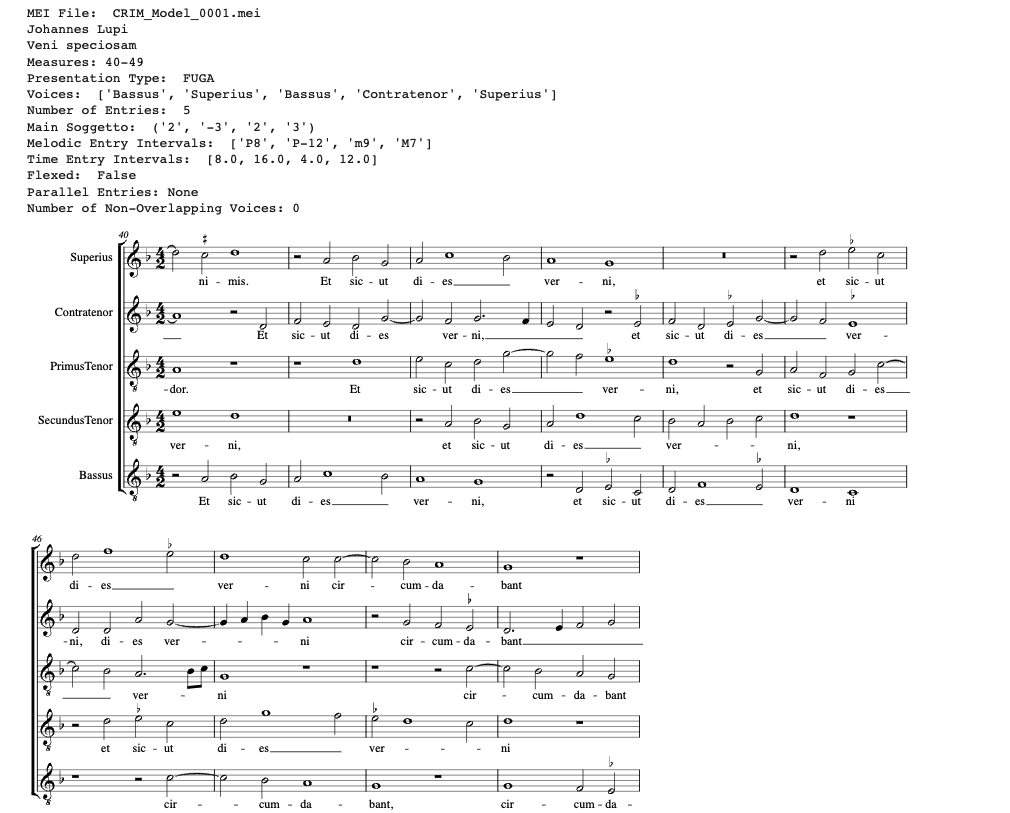

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import pandas as pd
import re
import os
import numpy
import itertools
# import collections
MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


In [4]:
# Select a prefix:

# prefix = 'Music_Files/'
# just add the CRIM Piece ID here
prefix = 'https://crimproject.org/mei/'
# just add the CRIM Piece ID here
mei_file = 'CRIM_Model_0008.mei'
url = prefix + mei_file
piece = importScore(url)

print(piece.metadata)

Previously imported piece detected.
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


In [21]:
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
mel_ng = piece.ngrams(df=mel, n=4)
entries = piece.entries(df=mel_ng)
entries


# piece.entries()

,[Superius],Altus,Tenor,Bassus
0.0,"(4, 2, 2, -3)",NaN,NaN,NaN
16.0,NaN,"(4, 2, 2, -3)",NaN,NaN
32.0,NaN,NaN,"(4, 2, 2, -3)",NaN
48.0,NaN,NaN,NaN,"(4, 2, 2, -3)"
56.0,"(-2, -2, -2, 2)",NaN,NaN,NaN
72.0,NaN,"(-2, -2, -2, 2)",NaN,NaN
88.0,NaN,NaN,"(-2, -2, -2, 2)",NaN
104.0,NaN,NaN,NaN,"(-2, -2, -2, 2)"
124.0,"(2, 2, -3, -2)",NaN,NaN,NaN
156.0,NaN,NaN,"(2, 2, -3, 3)",NaN


## Find Presentation Types
* `piece.presentationTypes()`

- limit to entries (following rests or section) = `limit_to_entries = True`.
- allowing 'moving window' of all patterns in every voice = `limit_to_entries = False`
- set the length of the soggetti with `melodic_ngram_length = n`
- set flexed threshold for first interval `head_flex=1`
- set the maximum difference between similar soggetti with `body_flex = n`
- to include all the hidden PENs and IDS (those found within longer Fugas, use `include_hidden_types = True`.  
- for faster (and simpler) listing of points of imitation without hidden forms, use `include_hidden_types = False`

* For example:

`piece.presentationTypes(limit_to_entries = True,
                            head_flex=1,
                        body_flex = 0,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)`
                       
                       
* Read the documentation:  `print(piece.presentationTypes.__doc__)`

In [86]:
p_types = piece.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = True,
                        combine_unisons = False,
                       melodic_ngram_length = 5)
p_types.head()

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
0,Johannes Lupi,Veni speciosam,0.0,"[1/1.0, 2/3.0, 5/1.0, 6/3.0]","[P-4, P-5, P-4]","[0.0, 12.0, 32.0, 44.0]","[(5, -2, 2, 3, -2), (4, -2, 2, 3, -2)]","[12.0, 20.0, 12.0]","[Superius, Contratenor, PrimusTenor, Bassus]",ID,4,True,0.0,None,0
2,Johannes Lupi,Veni speciosam,0.0,"[1/1.0, 2/3.0, 5/1.0, 6/3.0, 9/2.0, 10/1.0]","[P-4, P-5, P-4, P4, P8]","[0.0, 12.0, 32.0, 44.0, 66.0, 72.0]","[(5, -2, 2, 3, -2), (4, -2, 2, 3, -2)]","[12.0, 20.0, 12.0, 22.0, 6.0]","[Superius, Contratenor, PrimusTenor, Bassus, S...",FUGA,6,True,0.0,None,0
4,Johannes Lupi,Veni speciosam,94.0,"[12/4.0, 16/4.0]",[P4],"[94.0, 126.0]","[(-3, 2, 2, -2, -2)]",[32.0],"[Bassus, Bassus]",FUGA,2,False,0.0,None,1
5,Johannes Lupi,Veni speciosam,138.0,"[18/2.0, 21/2.0, 24/2.0]","[M9, M-9]","[138.0, 162.0, 186.0]","[(-2, -3, 2, 2, 2)]","[24.0, 24.0]","[PrimusTenor, Superius, PrimusTenor]",PEN,3,False,0.0,None,0
6,Johannes Lupi,Veni speciosam,138.0,"[18/2.0, 18/4.0, 20/4.0, 21/2.0, 24/2.0, 24/4....","[P-4, P8, P5, M-9, P-4, P4]","[138.0, 142.0, 158.0, 162.0, 186.0, 190.0, 198.0]","[(-2, -3, 2, 2, 2)]","[4.0, 16.0, 4.0, 24.0, 4.0, 8.0]","[PrimusTenor, Bassus, Contratenor, Superius, P...",FUGA,7,False,0.0,None,0


In [87]:
piece.presentationTypes().head()

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
0,Johannes Lupi,Veni speciosam,0.0,"[1/1.0, 2/3.0, 5/1.0, 6/3.0, 9/2.0, 10/1.0]","[P-4, P-5, P-4, P4, P8]","[0.0, 12.0, 32.0, 44.0, 66.0, 72.0]","[(5, -2, 2, 3), (4, -2, 2, 3)]","[12.0, 20.0, 12.0, 22.0, 6.0]","[Superius, Contratenor, PrimusTenor, Bassus, S...",FUGA,6,True,0.0,None,0
1,Johannes Lupi,Veni speciosam,94.0,"[12/4.0, 16/4.0]",[P4],"[94.0, 126.0]","[(-3, 2, 2, -2)]",[32.0],"[Bassus, Bassus]",FUGA,2,False,0.0,None,1
2,Johannes Lupi,Veni speciosam,138.0,"[18/2.0, 18/4.0, 19/4.0, 20/4.0, 21/2.0, 24/2....","[P-4, P4, P5, P5, M-9, P-4, P4]","[138.0, 142.0, 150.0, 158.0, 162.0, 186.0, 190...","[(-2, -3, 2, 2)]","[4.0, 8.0, 8.0, 4.0, 24.0, 4.0, 8.0]","[PrimusTenor, Bassus, SecundusTenor, Contraten...",FUGA,8,False,0.0,None,0
3,Johannes Lupi,Veni speciosam,226.0,"[29/2.0, 30/3.0, 31/2.0, 31/3.0, 34/4.0, 35/2....","[P-4, P8, P-4, P4, P5, P-8]","[226.0, 236.0, 242.0, 244.0, 270.0, 274.0, 290.0]","[(5, -2, 2, 3), (4, -2, 2, 3)]","[10.0, 6.0, 2.0, 26.0, 4.0, 16.0]","[PrimusTenor, Bassus, Superius, SecundusTenor,...",FUGA,7,True,0.0,None,0
4,Johannes Lupi,Veni speciosam,314.0,"[40/2.0, 41/2.0, 43/2.0, 43/4.0, 45/2.0]","[P8, P-12, m9, M7]","[314.0, 322.0, 338.0, 342.0, 354.0]","[(2, -3, 2, 3)]","[8.0, 16.0, 4.0, 12.0]","[Bassus, Superius, Bassus, Contratenor, Superius]",FUGA,5,False,0.0,None,0


In [18]:
# Here we find the 'entry soggetti'
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
mel_ng = piece.ngrams(df=mel, n=4)
entries = piece.entries(mel_ng)
ng_durs = piece.durations(df=entries)
det = piece.detailIndex(nr, offset=True, progress=True)
entries

,[Superius],Altus,Tenor,Bassus
0.0,"(4, 2, 2, -3)",NaN,NaN,NaN
16.0,NaN,"(4, 2, 2, -3)",NaN,NaN
32.0,NaN,NaN,"(4, 2, 2, -3)",NaN
48.0,NaN,NaN,NaN,"(4, 2, 2, -3)"
56.0,"(-2, -2, -2, 2)",NaN,NaN,NaN
72.0,NaN,"(-2, -2, -2, 2)",NaN,NaN
88.0,NaN,NaN,"(-2, -2, -2, 2)",NaN
104.0,NaN,NaN,NaN,"(-2, -2, -2, 2)"
124.0,"(2, 2, -3, -2)",NaN,NaN,NaN
156.0,NaN,NaN,"(2, 2, -3, 3)",NaN


In [72]:
# and stack the entries in the order of their appearance as one column
mels_stacked = entries.stack().to_frame()
mels_stacked.rename(columns =  {0:"pattern"}, inplace = True)
mels_stacked

,,pattern
0.0,Superius,"(5, -2, 2, 3)"
12.0,Contratenor,"(4, -2, 2, 3)"
32.0,PrimusTenor,"(5, -2, 2, 3)"
44.0,Bassus,"(4, -2, 2, 3)"
66.0,SecundusTenor,"(5, -2, 2, 3)"
...,...,...
1014.0,SecundusTenor,"(2, -2, -3, 2)"
1020.0,Bassus,"(2, -2, -3, 2)"
1030.0,Contratenor,"(2, -2, -3, 2)"
1038.0,SecundusTenor,"(2, -2, -3, 2)"


In [91]:
# edit distance, based on side-by-side comparison of melodic ngrams
# gets flexed and other similar soggetti
head_flex = 1
dist = piece.flexed_distance(head_flex, entries)
dist_stack = dist.stack().to_frame()
dist_stack

0
(5, -2, 2, 3)  (5, -2, 2, 3)     0
               (4, -2, 2, 3)     0
               (2, -2, 2, 2)     4
               (2, 2, -3, 4)    13
               (-3, 2, 2, -2)   17
...                             ..
(-5, 5, -5, 2) (3, -2, -5, 5)   18
               (-2, -3, 3, 2)   19
               (-2, -2, -2, 3)  14
               (2, -2, -3, 2)   16
               (-5, 5, -5, 2)    0

[1600 rows x 1 columns]

In [93]:
# filter body flex distances to threshold.  <2 is good
body_distance = 1
filtered_dist_stack = dist_stack[dist_stack[0] < body_distance]
filtered_dist = filtered_dist_stack.reset_index()
filtered_dist.rename(columns =  {'level_0':"source", 'level_1':'match'}, inplace = True)
filtered_dist.head()


,source,match,0
0,"(5, -2, 2, 3)","(5, -2, 2, 3)",0
1,"(5, -2, 2, 3)","(4, -2, 2, 3)",0
2,"(4, -2, 2, 3)","(5, -2, 2, 3)",0
3,"(4, -2, 2, 3)","(4, -2, 2, 3)",0
4,"(2, -2, 2, 2)","(2, -2, 2, 2)",0


In [79]:
# Group the filtered distanced patterns
full_list_of_matches = filtered_dist.groupby('source')['match'].apply(list).reset_index()
full_list_of_matches

,source,match
0,"(-2, -2, -2, -2)","[(-2, -2, -2, -2)]"
1,"(-2, -2, -2, 2)","[(-2, -2, -2, 2)]"
2,"(-2, -2, -2, 3)","[(-2, -2, -2, 3)]"
3,"(-2, -2, -2, 4)","[(-2, -2, -2, 4)]"
4,"(-2, -2, -2, 5)","[(-2, -2, -2, 5)]"
5,"(-2, -2, -3, 2)","[(-2, -2, -3, 2)]"
6,"(-2, -2, -3, 5)","[(-2, -2, -3, 5)]"
7,"(-2, -3, 2, 2)","[(-2, -3, 2, 2)]"
8,"(-2, -3, 3, 2)","[(-2, -3, 3, 2)]"
9,"(-2, 2, -2, -3)","[(-2, 2, -2, -3)]"


In [80]:
points = pd.DataFrame(columns=['Composer',
                    'Title',
                    'First_Offset',
                    'Measures_Beats',
                    'Melodic_Entry_Intervals',
                    'Offsets',
                    'Soggetti',
                    'Time_Entry_Intervals',
                    'Voices',
                    'Presentation_Type'])
points2 = pd.DataFrame()
# defines column order in final df
# others are at the end for the overlapping entries
col_order = list(points.columns) + ['Number_Entries',
                                        'Flexed_Entries',
                                            'Parallel_Entries',
                                            'Parallel_Voice',
                                            'Count_Offsets',
                                            'Offsets_Key']


In [81]:
# get the matching soggetti
for matches in full_list_of_matches["match"]:
    related_entry_list = mels_stacked[mels_stacked['pattern'].isin(matches)]
    entry_array = related_entry_list.reset_index(level=1).rename(columns = {'level_1': "voice", 0: "pattern"})
    print(entry_array)
    offset_list = entry_array.index.to_list()
    print("The offset list of these entries is: " + str(offset_list))
#     split_list = list(ImportedPiece._split_by_threshold(offset_list))
# #     # classification of the full set
#     for item in split_list:
#         temp = piece._temp_dict_of_details(item, entry_array, det, matches)
#         points = points.append(temp, ignore_index=True)
#         points['Presentation_Type'] = points['Time_Entry_Intervals'].apply(ImportedPiece._classify_by_offset)
#         points.drop_duplicates(subset=["First_Offset"], keep='first', inplace = True)
#         points = points[points['Offsets'].apply(len) > 1]

#     points["Offsets_Key"] = points["Offsets"].apply(ImportedPiece._offset_joiner)
#     points['Flexed_Entries'] = points["Soggetti"].apply(len) > 1
#     points["Number_Entries"] = points["Offsets"].apply(len)
#     points["Count_Offsets"] = points["Offsets"].apply(set).apply(len)
#     points = points[points["Count_Offsets"] > 1]
#     points = points.reindex(columns=col_order).sort_values("First_Offset").reset_index(drop=True)
#     # applying various private functions for overlapping entry tests.
#     # note that ng_durs must be passed to the first of these, via args
#     points["Entry_Durs"] = points[["Offsets", "Voices"]].apply(ImportedPiece._dur_ngram_helper, args=(ng_durs,), axis=1)
#     points["Overlaps"] = points[["Entry_Durs", "Offsets"]].apply(ImportedPiece._entry_overlap_helper, axis=1)
#     points["Count_Non_Overlaps"] = points["Overlaps"].apply(ImportedPiece._non_overlap_count)
#     points.drop(['Count_Offsets', 'Offsets_Key', 'Entry_Durs', 'Overlaps'], axis=1, inplace=True)
# points

             voice           pattern
254.0  Contratenor  (-2, -2, -2, -2)
The offset list of these entries is: [254.0]
               voice          pattern
174.0  SecundusTenor  (-2, -2, -2, 2)
378.0    Contratenor  (-2, -2, -2, 2)
The offset list of these entries is: [174.0, 378.0]
             voice          pattern
942.0  PrimusTenor  (-2, -2, -2, 3)
The offset list of these entries is: [942.0]
        voice          pattern
384.0  Bassus  (-2, -2, -2, 4)
The offset list of these entries is: [384.0]
             voice          pattern
382.0  PrimusTenor  (-2, -2, -2, 5)
The offset list of these entries is: [382.0]
               voice          pattern
774.0  SecundusTenor  (-2, -2, -3, 2)
782.0    Contratenor  (-2, -2, -3, 2)
786.0    PrimusTenor  (-2, -2, -3, 2)
794.0       Superius  (-2, -2, -3, 2)
802.0         Bassus  (-2, -2, -3, 2)
810.0  SecundusTenor  (-2, -2, -3, 2)
822.0         Bassus  (-2, -2, -3, 2)
The offset list of these entries is: [774.0, 782.0, 786.0, 794.0, 802.

In [82]:
# gets Progress!

temp = p_types.set_index("First_Offset")
temp2 = temp
piece.di(temp2, progress=True, beat=False, measure=False)

,Composer,Title,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
Progress,,,,,,,,,,,,,,
0.000000,Johannes Lupi,Veni speciosam,"[1/1.0, 5/1.0, 9/2.0, 10/1.0]","[P-8, P1, P8]","[0.0, 32.0, 66.0, 72.0]","[(5, -2, 2, 3, -2)]","[32.0, 34.0, 6.0]","[Superius, PrimusTenor, SecundusTenor, Superius]",FUGA,4,False,0.0,None,0
0.011194,Johannes Lupi,Veni speciosam,"[2/3.0, 6/3.0]",[P-8],"[12.0, 44.0]","[(4, -2, 2, 3, -2)]",[32.0],"[Contratenor, Bassus]",FUGA,2,False,0.0,None,0
0.087687,Johannes Lupi,Veni speciosam,"[12/4.0, 16/4.0]",[P4],"[94.0, 126.0]","[(-3, 2, 2, -2, -2)]",[32.0],"[Bassus, Bassus]",FUGA,2,False,0.0,None,1
0.128731,Johannes Lupi,Veni speciosam,"[18/2.0, 18/4.0, 20/4.0, 21/2.0, 24/2.0, 24/4....","[P-4, P8, P5, M-9, P-4, P4]","[138.0, 142.0, 158.0, 162.0, 186.0, 190.0, 198.0]","[(-2, -3, 2, 2, 2)]","[4.0, 16.0, 4.0, 24.0, 4.0, 8.0]","[PrimusTenor, Bassus, Contratenor, Superius, P...",FUGA,7,False,0.0,None,0
0.210821,Johannes Lupi,Veni speciosam,"[29/2.0, 31/2.0, 34/4.0]","[P5, P1]","[226.0, 242.0, 270.0]","[(5, -2, 2, 3, -2)]","[16.0, 28.0]","[PrimusTenor, Superius, Contratenor]",FUGA,3,False,0.0,None,0
0.220149,Johannes Lupi,Veni speciosam,"[30/3.0, 31/3.0, 35/2.0, 37/2.0]","[P5, P8, P-8]","[236.0, 244.0, 274.0, 290.0]","[(4, -2, 2, 3, -2)]","[8.0, 30.0, 16.0]","[Bassus, SecundusTenor, Superius, PrimusTenor]",FUGA,4,False,0.0,None,0
0.292910,Johannes Lupi,Veni speciosam,"[40/2.0, 41/2.0, 43/2.0, 43/4.0, 45/2.0]","[P8, P-12, m9, M7]","[314.0, 322.0, 338.0, 342.0, 354.0]","[(2, -3, 2, 3, -2)]","[8.0, 16.0, 4.0, 12.0]","[Bassus, Superius, Bassus, Contratenor, Superius]",FUGA,5,False,0.0,None,0
0.302239,Johannes Lupi,Veni speciosam,"[41/3.0, 42/2.0, 44/4.0, 46/2.0]","[P-4, M-2, P5]","[324.0, 330.0, 350.0, 362.0]","[(2, -3, 2, 4, -2)]","[6.0, 20.0, 12.0]","[PrimusTenor, SecundusTenor, PrimusTenor, Secu...",FUGA,4,False,0.0,None,0
0.401119,Johannes Lupi,Veni speciosam,"[54/4.0, 55/2.0, 56/2.0, 58/4.0, 60/4.0, 62/2....","[P4, P5, P-5, P-4, P-5, P4, P1]","[430.0, 434.0, 442.0, 462.0, 478.0, 490.0, 492...","[(4, 1, -2, 2, -2)]","[4.0, 8.0, 20.0, 16.0, 12.0, 2.0, 26.0]","[PrimusTenor, Contratenor, Superius, PrimusTen...",FUGA,8,False,0.0,None,1


In [12]:
piece.di(temp2, _all=True)

,,,,,,,,Composer,Title,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
Measure,Beat,Offset,TSig,Sounding,Progress,Lowest,Highest,,,,,,,,,,,,,,
1,1.0,0.0,4/2,1,0.000000,D5,D5,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,"[1/1.0, 2/1.0, 6/1.0, 7/1.0]","[P-5, P-4, P-5]","[0.0, 8.0, 40.0, 48.0]","[(-3, 3, 2, -2, -3)]","[8.0, 32.0, 8.0]","[Cantus, Altus, Tenor, Bassus]",ID,4.0,False,0.0,None,0.0
19,4.0,150.0,4/2,4,0.284091,D4,A4,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,"[19/4.0, 22/4.0, 25/4.0, 27/4.0, 29/4.0, 32/2....","[P4, P-4, P-5, P8, P8, P-11]","[150.0, 174.0, 198.0, 214.0, 230.0, 250.0, 274.0]","[(-3, 2, 2, -2, -4)]","[24.0, 24.0, 16.0, 16.0, 20.0, 24.0]","[Tenor, Altus, Tenor, Bassus, Altus, Cantus, B...",FUGA,7.0,False,0.0,None,0.0
38,2.0,298.0,4/2,4,0.564394,C3,C5,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,"[38/2.0, 38/4.0, 40/2.0, 42/2.0, 44/1.0, 46/2....","[P-5, P8, P-12, P8, P8, P-11]","[298.0, 302.0, 314.0, 330.0, 344.0, 362.0, 382.0]","[(1, 1, -3, 3, -2)]","[4.0, 12.0, 16.0, 14.0, 18.0, 20.0]","[Altus, Tenor, Cantus, Bassus, Altus, Cantus, ...",FUGA,7.0,False,0.0,None,0.0
50,2.0,394.0,4/2,4,0.746212,B3,G4,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,"[50/2.0, 51/4.0, 53/2.0, 55/2.0, 56/4.0, 59/1....","[P5, P-8, P4, P5, P-8, P8, P-4, P-5]","[394.0, 406.0, 418.0, 434.0, 446.0, 464.0, 486...","[(-2, 2, 1, 3, -2)]","[12.0, 12.0, 16.0, 12.0, 18.0, 22.0, 4.0, 16.0]","[Altus, Cantus, Bassus, Tenor, Altus, Bassus, ...",FUGA,9.0,False,0.0,None,0.0


In [8]:
p_types['Offsets'][0]

[0.0, 16.0, 32.0, 48.0]

In [15]:
mel = piece.melodic(kind='d')
ng = piece.ngrams(df=mel, n=5)
ng_durs = piece.durations(df=ng)
ng_durs
# p_types["Entry_Durs"] = p_types[["Offsets", "Voices"]].apply(piece._dur_ngram_helper, args=(ng_durs,), axis=1)

,[Superius],Altus,Tenor,Bassus
4.0,58.0,NaN,NaN,NaN
20.0,NaN,58.0,NaN,NaN
36.0,NaN,NaN,58.0,NaN
52.0,NaN,NaN,NaN,58.0
62.0,2.0,NaN,NaN,NaN
...,...,...,...,...
1208.0,NaN,NaN,32.0,4.0
1212.0,NaN,NaN,NaN,28.0
1240.0,4.0,4.0,4.0,4.0
1244.0,60.0,4.0,60.0,60.0


In [5]:
# pd.set_option('display.max_rows', None)
p_types.sort_values("Number_Entries").head()

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Offsets,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type,Number_Entries,Flexed_Entries,Parallel_Entries,Parallel_Voice,Count_Non_Overlaps
1,Johannes Lupi,Veni speciosam,94.0,"[12/4.0, 16/4.0]",[P4],"[94.0, 126.0]","[(-3, 2, 2, -2)]",[32.0],"[Bassus, Bassus]",FUGA,2,False,0.0,None,1
12,Johannes Lupi,Veni speciosam,850.0,"[106/2.0, 111/4.0]",[P11],"[850.0, 894.0]","[(3, -2, -3, 5)]",[44.0],"[SecundusTenor, Superius]",FUGA,2,False,0.0,None,1
13,Johannes Lupi,Veni speciosam,854.0,"[106/4.0, 107/4.0]",[P-8],"[854.0, 862.0]","[(3, -2, -2, 5)]",[8.0],"[Superius, Bassus]",FUGA,2,False,0.0,None,0
5,Johannes Lupi,Veni speciosam,324.0,"[41/3.0, 42/2.0, 44/4.0, 46/2.0]","[P-4, M-2, P5]","[324.0, 330.0, 350.0, 362.0]","[(2, -3, 2, 4)]","[6.0, 20.0, 12.0]","[PrimusTenor, SecundusTenor, PrimusTenor, Secu...",FUGA,4,False,0.0,None,0
6,Johannes Lupi,Veni speciosam,394.0,"[50/2.0, 51/4.0, 53/2.0, 54/3.0]","[P5, P1, P-8]","[394.0, 406.0, 418.0, 428.0]","[(3, 2, -3, -2)]","[12.0, 12.0, 10.0]","[SecundusTenor, PrimusTenor, SecundusTenor, Ba...",FUGA,4,False,0.0,None,0


### Inventory by Type, Length, and Soggetti

In [4]:
pd.set_option('display.max_rows', None)
p_types["Mel_Ent"] = p_types['Melodic_Entry_Intervals'].apply(joiner)
p_types["Soggetti_Joined"] = p_types['Soggetti'].apply(joiner)
p_types.groupby(['Presentation_Type', 'Number_Entries', 'Soggetti_Joined']).size().reset_index(name='counts')

,Presentation_Type,Number_Entries,Soggetti_Joined,counts
0,FUGA,2,"('-3', '-2', '2', '2', '2')",1
1,FUGA,2,"('1', '-2', '-2', '-2', '-2')",1
2,FUGA,2,"('1', '-2', '-2', '-3', '5')",1
3,FUGA,2,"('1', '-2', '-2', '2', '-2')",1
4,FUGA,2,"('1', '1', '2', '-2', '-2')",1
5,FUGA,2,"('1', '1', '2', '-3', '2')",1
6,FUGA,2,"('1', '2', '2', '1', '2')",1
7,FUGA,2,"('2', '2', '1', '2', '-2')",1
8,FUGA,2,"('2', '2', '2', '-2', '2')",1
9,ID,4,"('1', '1', '2', '-2', '-2')",1


In [16]:
pd.set_option('display.max_rows', None)
p_types["Mel_Ent"] = p_types['Melodic_Entry_Intervals'].apply(joiner)
p_types["Soggetti_Joined"] = p_types['Soggetti'].apply(joiner)
p_types.groupby(['Soggetti_Joined', 'Presentation_Type', 'Number_Entries']).size().reset_index(name='counts')

,Soggetti_Joined,Presentation_Type,Number_Entries,counts
0,"('-2', '-2', '5', '-8', '4')",FUGA,2,1
1,"('-3', '-2', '2', '2', '2')",FUGA,5,1
2,"('-3', '-2', '2', '2', '2')",PEN,3,2
3,"('-3', '-2', '2', '2', '2')",PEN,4,1
4,"('-3', '-2', '2', '3', '-2')",FUGA,5,1
5,"('-3', '-2', '2', '3', '-2')",ID,4,2
6,"('-3', '-2', '2', '3', '-2')",PEN,3,1
7,"('-3', '1', '4', '-2', '-2')",FUGA,5,1
8,"('-3', '1', '4', '-2', '-2')",ID,4,1
9,"('-3', '1', '4', '-2', '-2')",PEN,3,1


In [6]:
p_types.to_csv("saved_csv/mySearch.csv")

## Render Excerpts with Verovio

* With ptypes defaults:

>`piece.verovioPtypes()`

* Or after filtering, pass the p_types dataframe to the function:

>`piece.verovioPtypes(p_types)`



In [5]:
piece.verovioPtypes(p_types)

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 1-11
Presentation Type:  PEN
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('4', '1', '2', '2', '-3')]
Melodic Entry Intervals:  ['P-8', 'P1', 'P-8']
Time Entry Intervals:  [16.0, 16.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 8-16
Presentation Type:  PEN
Voices:  ['[Superius]', 'Altus', 'Tenor']
Number of Entries:  3
Soggetti:  [('-2', '-2', '-2', '2', '-2')]
Melodic Entry Intervals:  ['P-8', 'P1']
Time Entry Intervals:  [16.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 16-26
Presentation Type:  PEN
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '2', '-3')]
Melodic Entry Intervals:  ['P-8', 'P1', 'P-8']
Time Entry Intervals:  [16.0, 16.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 23-32
Presentation Type:  FUGA
Voices:  ['Altus', 'Bassus']
Number of Entries:  2
Soggetti:  [('-3', '-2', '2', '2', '2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [40.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 31-39
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('1', '2', '2', '1', '2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [32.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 54-64
Presentation Type:  ID
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('4', '-2', '2', '2', '-3')]
Melodic Entry Intervals:  ['P-5', 'P-4', 'P-5']
Time Entry Intervals:  [4.0, 36.0, 4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 64-73
Presentation Type:  ID
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('2', '-3', '2', '-3', '2')]
Melodic Entry Intervals:  ['P-5', 'P-4', 'P-5']
Time Entry Intervals:  [16.0, 8.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 78-85
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('1', '1', '2', '-3', '2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 94-102
Presentation Type:  FUGA
Voices:  ['Altus', 'Altus']
Number of Entries:  2
Soggetti:  [('1', '1', '2', '-2', '-2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [48.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 111-126
Presentation Type:  ID
Voices:  ['[Superius]', 'Tenor', '[Superius]', 'Tenor']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '-2', '-2')]
Melodic Entry Intervals:  ['P-8', 'P8', 'P-8']
Time Entry Intervals:  [24.0, 40.0, 24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 111-123
Presentation Type:  FUGA
Voices:  ['Altus', 'Altus']
Number of Entries:  2
Soggetti:  [('1', '-2', '-2', '-2', '-2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [64.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 114-126
Presentation Type:  FUGA
Voices:  ['Bassus', 'Bassus']
Number of Entries:  2
Soggetti:  [('1', '-2', '-2', '-3', '5')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [64.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 115-127
Presentation Type:  FUGA
Voices:  ['Altus', 'Altus']
Number of Entries:  2
Soggetti:  [('2', '2', '1', '2', '-2')]
Melodic Entry Intervals:  ['P1']
Time Entry Intervals:  [64.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 1


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 127-133
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('2', '2', '2', '-2', '2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 133-140
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('1', '-2', '-2', '2', '-2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0
